In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

In [ ]:
nltk.download("stopwords")

df = pd.read_csv("/content/drive/MyDrive/Concept and Technologoies of AI/imdb_reviews_50.csv")


stop_words = set(stopwords.words("english"))           # PREPROCESSING FUNCTION
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]     # remove stopwords + stem
    return " ".join(words)

df["clean_review"] = df["review"].apply(clean_text)


X = df["clean_review"]   # TRAIN-TEST SPLIT
y = df["sentiment"].map({"positive":1, "negative":0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_bow, y_train)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_bow)
y_prob = model.predict_proba(X_test_bow)[:,1]  # PREDICT

print("Accuracy:", accuracy_score(y_test, y_pred))   #metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("Classification Report:")
classification_report(y_test, y_pred)

print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)


Accuracy: 0.9
Precision: 0.8
Recall: 1.0
F1 Score: 0.8888888888888888
ROC-AUC: 0.9166666666666667
Classification Report:
Confusion Matrix:


array([[5, 1],
       [0, 4]])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [7]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technologoies of AI/breast_cancer_200.csv")

# BASIC EDA
df.info()
df.describe()
df.isnull().sum()

# Handle missing values
df.fillna(df.mean(), inplace=True)

# TRAIN TEST SPLIT
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             200 non-null    float64
 1   texture_mean            200 non-null    float64
 2   perimeter_mean          200 non-null    float64
 3   area_mean               200 non-null    float64
 4   smoothness_mean         200 non-null    float64
 5   compactness_mean        200 non-null    float64
 6   concavity_mean          200 non-null    float64
 7   symmetry_mean           200 non-null    float64
 8   fractal_dimension_mean  200 non-null    float64
 9   target                  200 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.8 KB


In [8]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

Selected Features:
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_mean',
       'fractal_dimension_mean'],
      dtype='object')


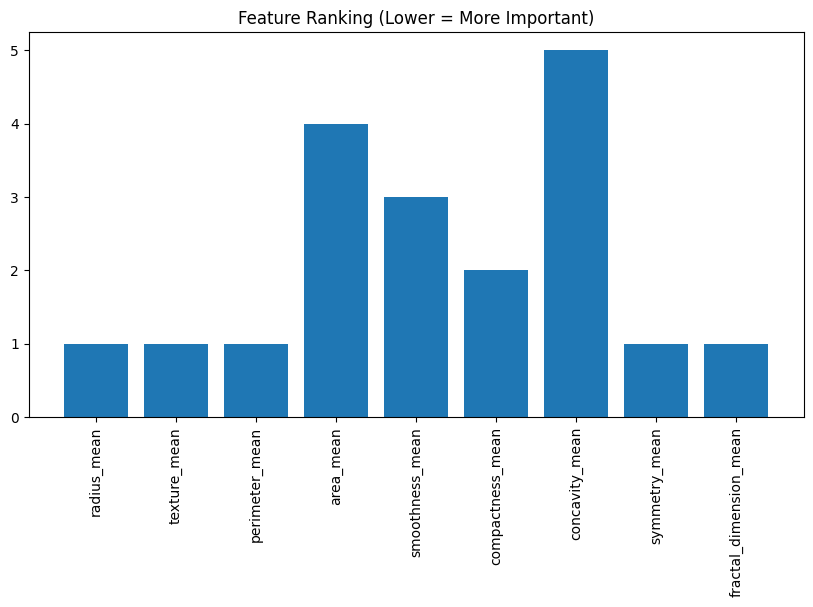

In [9]:
model = LogisticRegression(max_iter=2000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
ranking = rfe.ranking_

print("Selected Features:")
print(selected_features)

# VISUALIZE RANKING
plt.figure(figsize=(10,5))
plt.bar(X.columns, ranking)
plt.title("Feature Ranking (Lower = More Important)")
plt.xticks(rotation=90)
plt.show()


In [10]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)
y_prob = clf.predict_proba(X_test_sel)[:,1]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.675
Precision: 0.7096774193548387
Recall: 0.8461538461538461
F1 Score: 0.7719298245614035
ROC-AUC: 0.8214285714285714


In [12]:
rfe = RFE(model, n_features_to_select=7)
rfe


RFE(estimator=LogisticRegression(max_iter=2000), n_features_to_select=7)